###Unsupervised Learning Algorithms

We're interested in patterns and learning data representations. We look into the Bayesian non-parametric extension of K-means algorithm and EM algorithm of Gaussian mixture models (GMMs), and the dimentionality reduction technicques PCA and t-SNE.

####**Dirichlet process K-means**

Dirichlet process (DP) K-means is a Bayesian nonparametric extension of K-means algorithm.  DP-means is similar to the K-means except that the new clusters are created whenever a data point issufficient far away from all existing cluster centroids - the number of clusters grows with the number of data. DP-means converges to a local optimum of a K-means-like objective that includes a penalty for the number of clusters.


We select the cluster K based
$$\arg \min_k \{ \|x_i - \mu_1\|^2, \dots, \|x_i - \mu_k\|^2, \lambda \}$$


The resulting update is analogous to the K-means reassignment step during which we reassign a point to the cluster corresponding to the closest mean or start a new cluster if Euclidean distance is greater than lambda.




$
\begin{array}{l}
\text{Initialize: } K = 1, \mathcal{L}_1 = \{x_1, \dots, x_n\}, \mu_1 = \text{global mean} \\
\text{Labels: } z_i = 1 \text{ for all } i = 1, \dots, n \\
\lambda = \text{kpp}(X, K_{init}) \\
\\
\mathbf{repeat} \text{ until convergence:} \\
\quad \mathbf{for} \text{ each } x_i: \\
\quad \quad \text{compute } d_{ic} = \|x_i - \mu_c\|^2 \text{ for } c = 1, \dots, K \\
\quad \quad \mathbf{if} \min_c(d_{ic}) > \lambda: \\
\quad \quad \quad K = K + 1 \\
\quad \quad \quad \mu_K = x_i \\
\quad \quad \quad z_i = K \\
\quad \quad \mathbf{else}: \\
\quad \quad \quad z_i = \arg\min_c(d_{ic}) \\
\quad \mathbf{end} \\
\\
\quad \mathbf{for} \text{ each cluster } \mathcal{L}_j = \{x_i \mid z_i = j\}: \\
\quad \quad \mu_j = \frac{1}{|\mathcal{L}_j|} \sum_{x \in \mathcal{L}_j} x \\
\quad \mathbf{end} \\
\\
\textbf{Objective: } \sum_{c=1}^{K} \sum_{x \in \mathcal{L}_c} \|x - \mu_c\|^2 + \lambda K
\end{array}
$

To evaluate cluster performance we can use the normalized mutual information (NMI), variation of information (VI), and adjusted rand index (ARI)


$NMI(X, Y) = \frac{I(X; Y)}{\frac{H(X) + H(Y)}{2}}$


$H(X)$ is the entropy of $X$ and $I(X, Y)$ is the mutual information between ground truth label assignments $X$ (when they are available) and computed assignments $Y$.

Mutual information as


$I(X;Y) = \sum_{i} \sum_{j} p_{XY}(i, j) \log \left( \frac{p_{XY}(i, j)}{p_X(i)p_Y(j)} \right)$

Variational information as

$VI(X;Y) = H(X|Y) + H(Y|X)$

ARI computes similarity measure between two clusters considering all pairs of samples and counting the pairs assigned inthe same or different clusters in the predicted and truw clusters.

$RI = \frac{TP + TN}{TP + FP + FN + TN}$

$ARI = \frac{RI - E[RI]}{\max(RI) - E[RI]}$



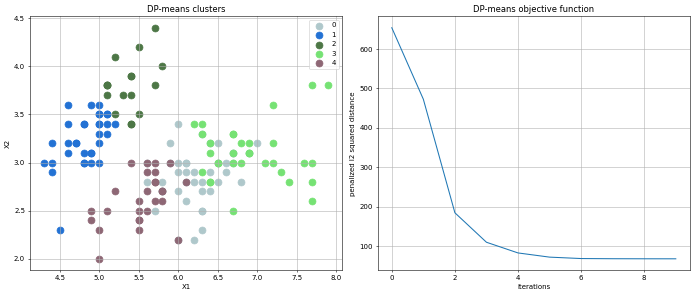

In [ ]:
''' the performance of the DP-means clustering
    DP-mean cluster and the objective function '''

####**Gaussian mixture models**

Mixture models are commonly used to model complex density distributions. Plotting the data in high-dimensional space we likeliy see the nonuniform density characterized by groups or clusters of data points. We model each cluster using base probability distribution. Mixture models consist of a convex combination of Kbase models.


A Gsussian model is written as
$$p(x_i | \theta) = \sum_{k=1}^{K} \pi_k p_k(x_i | \theta_k) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)$$

Here $\pi_k$ are the mixing proportions that satisfy $0 \le \pi_k \le 1, \quad \sum_{k=1}^{K} \pi_k = 1$

While Kmeans model only cluster means, the GMMs model mean and covariance and capture the data more accurately.

**Expectation Maximization (EM) Algorithm**


The EM algorithm provides a way to compute the MAP estimates when we have unobserved latent variables. It is iterative that alternates between inferring the latent variables given the parameters ($E-step$).

We define complete data log likelihood $L_c(\theta)$ where $x_i$ are the observed random variables and $z_i$ are unobserved
$$l_c(\theta) = \sum_{i=1}^{N} \log(p(x_i, z_i | \theta))$$

The goal of the $E-step$ is to compute $Q(\theta, \theta^(k-1))$ on which the MAP estimates depend. The goal of the M-step is to recompute theta by finding MAP estimates


E-step:
$$Q(\theta, \theta^{(k-1)}) = \mathbb{E}_{\theta^{(k-1)}} [l_c(\theta) \mid D, \theta^{(k-1)}]$$
M-step:
$$\theta^{(k)} = \arg \max_{\theta} Q(\theta, \theta^{(k-1)}) + \log(p(\theta))$$

$
\begin{array}{l}
\mathbf{class} \text{ GMM}: \\
\quad \mathbf{function} \text{ gmm\_em}(X, K): \\
\quad \quad \pi_k = \frac{1}{K}, \ \mu_k = \text{KMeans}(X, K), \ \Sigma_k = I_{d \times d} \\
\quad \quad \mathbf{for} \ \text{iter} = 1, 2, \dots, \text{max\_iter}: \\
\quad \quad \quad r_{ik} = \text{e\_step}(\pi_k, \mu_k, \Sigma_k, X) \\
\quad \quad \quad \pi_k, \mu_k, \Sigma_k = \text{m\_step}(r_{ik}, X) \\
\quad \quad \mathbf{end \ for} \\
\quad \quad \mathbf{return} \ \pi_k, \mu_k, \Sigma_k \\
\quad \mathbf{function} \text{ e\_step}(\pi_k, \mu_k, \Sigma_k, X): \\
\quad \quad r_{ik} = \frac{{N}(x_i \mid \mu_k, \Sigma_k) \pi_k}{\sum_{j=1}^{K} \mathcal{N}(x_i \mid \mu_j, \Sigma_j) \pi_j} \\
\quad \quad \mathbf{return} \ r_{ik}
\quad \mathbf{function} \text{ m\_step}(r_{ik}, X): \\
\quad \quad N_k = \sum_{i=1}^{n} r_{ik} \\
\quad \quad \pi_k = \frac{N_k}{n} \\
\quad \quad \mu_k = \frac{1}{N_k} \sum_{i=1}^{n} r_{ik} x_i \\
\quad \quad \Sigma_k = \frac{1}{N_k} \sum_{i=1}^{n} r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T \\
\quad \quad \mathbf{return} \ \pi_k, \mu_k, \Sigma_k
\end{array}
$

There are three functions, gmm_em, e-step and m-step. In the gmm_em we initialize the K-means algorithm and covariances as identity matrices. We iterate between -step of data points i to each of the k clusters and m-step to compute the model parameters. The code in e-step and m-step follows derivations. We use synthetic dataset to compare our ground truth GMM parameters with the parameters inferred by the EM algorithm.

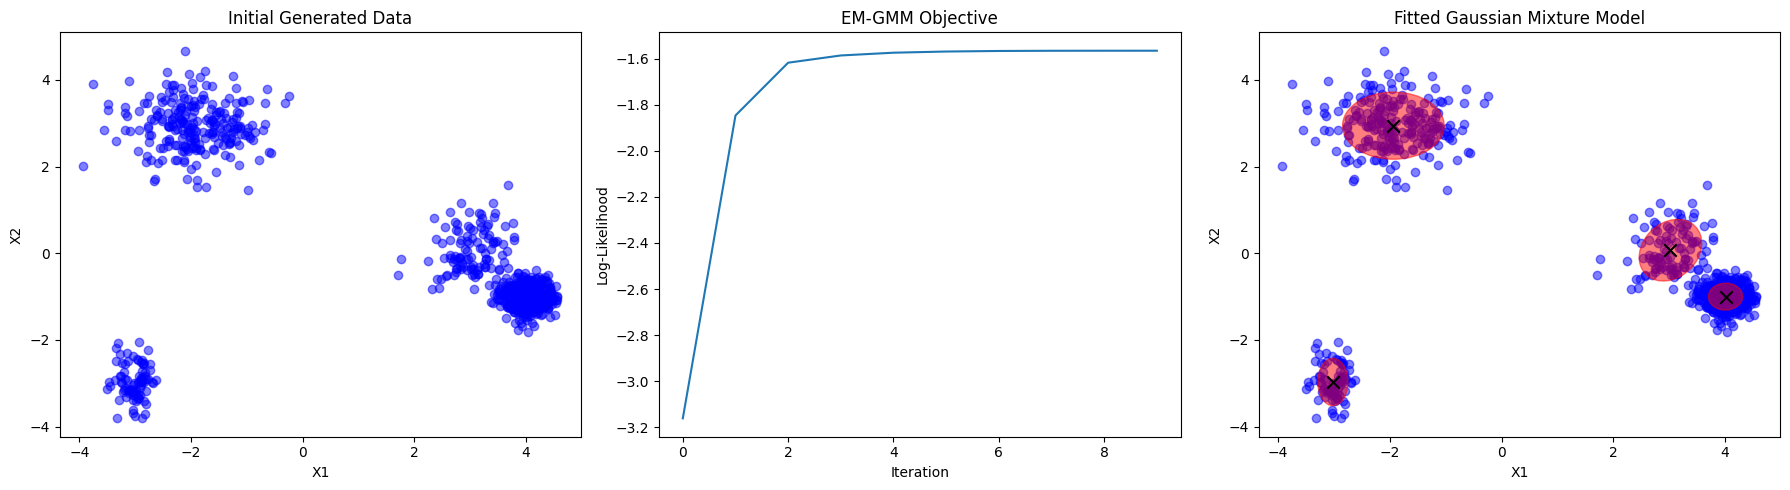

In [ ]:
''' Fitted Gaussian mixture models - EM GMM and the objective function '''

The inferred Gaussian mixture overlayed with the data. The Gaussian ellipses closely fit the data. This can be confirmed by a monotonic increase of the log likelihood objective. We explore two popular dimensionality reduction techniques, principal component analysis and T-distributed stochastic neighbor embedding.

Gaussian Mixture Model **(EM) visualization**

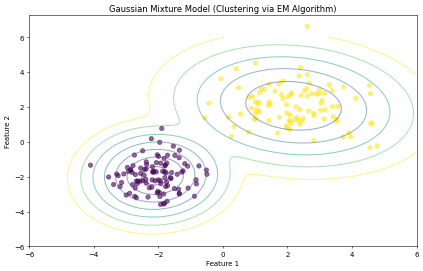

In [ ]:
''' GMM visualization '''

####**Dimensionality reduction - PCA and t-SNA**

In dimensionality reduction we project high-dimensional data into lower-dimensional data (subspace) in a way that preserves the unique characteristics of the data.

####**PCA**

In PCA we project our vector data in R^D onto lower dimensional vector R^L with L < D, such that the variance of projected data is maximized. Maximizing the variance of projected data is the core principle of PCA allows us to preserve the characteristics ofthe data.

We measure the quality of the projection as a reconstructive error (RE).
$$E = \frac{1}{N} \sum_{i=1}^{N} \|x_i - \hat{x}_i\|^2 = \|X - WZ\|_F^2$$


We write variance of projected data as
$$\frac{1}{N} \sum_{i=1}^{N} z_i^2 = \frac{1}{N} \sum_{i=1}^{N} (\mathbf{w}^T \mathbf{x}_i \mathbf{x}_i^T \mathbf{w}) = \mathbf{w}^T \hat{\Sigma} \mathbf{w}$$


We write the Lagrangian as
$$\max J(\mathbf{w}) = \mathbf{w}^T \hat{\Sigma} \mathbf{w} + \lambda(1 - \mathbf{w}^T \mathbf{w})$$

Taking the derivative and setting it to zero gives us $$\hat{\text{Cov}} \mathbf{w} = \lambda \mathbf{w}$$

**PCA algorithm**
The function transform, first computes the empirical covariance matrix from the high dimensional data matrix X. We compute the eigenvalue decompositionof the covariance matrix, sort the eigenvalues and use the sorted index to select the top K largest eigenvalues and their corresponding eigenvectors. Finally we compute PCA by multiplying the data matrix with the matrix of top K eigenvalues.

$
\begin{array}{l}
\mathbf{class} \text{ PCA}: \\
\quad \mathbf{function} \text{ transform}(X, K): \\
\quad \quad \Sigma = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T \quad \text{// Compute covariance matrix} \\
\quad \quad V, \Lambda = \text{eig}(\Sigma) \quad \text{// Eigenvalue decomposition: } \Sigma V = V \Lambda \\
\quad \quad \text{idx} = \text{descending\_sort}(\Lambda) \\
\quad \quad V_{pca} = V[:, \text{idx}_{1:K}] \quad \text{// Select top } K \text{ eigenvectors} \\
\quad \quad \Lambda_{pca} = \Lambda[\text{idx}_{1:K}] \quad \text{// Select top } K \text{ eigenvalues} \\
\quad \quad X_{pca} = X \cdot V_{pca} \quad \text{// Project data into lower dimension} \\
\quad \quad \mathbf{return} \ X_{pca}
\end{array}
$

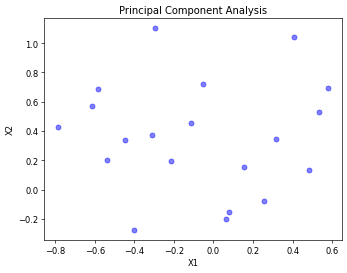

In [ ]:
''' PCA projection of a random matrix '''

####**Manifold learning**

Manifold is a topological space that locally resembles Euclidean space.
Images are high dimensional objects that live on manifolds. By modeling image spaces as manifolds we study their properties. We perform visualizations using embedding.

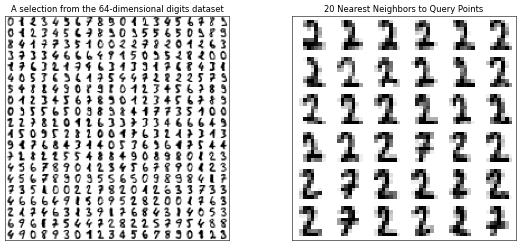

In [ ]:
''' A selection from the 64-dimensional digits dataset
Use KD-tree to find k-nearest neighbors to a query image '''

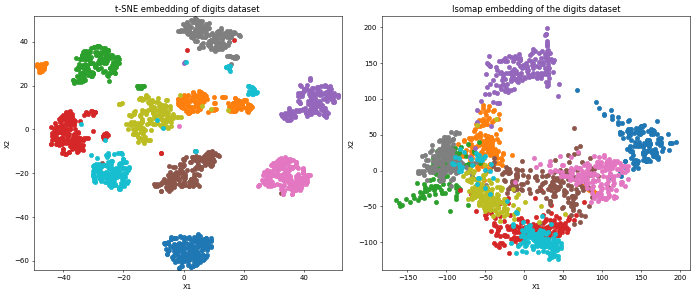

In [ ]:
''' t-SNE embedding with 10 clustsers in 2D space, of digits dataset and Isomap'''